# Digit Recognition with ConvNets
In this task, you will carry out digit recognition (using MNIST database) using convolutional neural networks. The same problem was solved in the previous practical using vanilla ANNs. You may compare the performance of a traditional ANN with that of a ConvNet using the same experimental setup.

## Convolutional Neural Networks
Convolutional Neural Networks (CNN) make the assumption that the input are images. The CNN architecture is defined by different layers typically including the Input Layer, Convolutional Layer, Activation Layer (ReLU), Pooling Layer, Fully-Connected Layer. The input layer normally has the shape ‘height x width x depth’. In our example of digit recognition, the shape is 28x28x1 but in colored images the depth would be 3, one for each value in the RGB color model. The input is passed to a convolutional layer using multiple filters, it creates another matrix with different height, width and as deep as many filters defined. A filter is a small window that traverses the image to compute its features. Its output goes into and activation function which in our case is the ReLU function. A pooling layer is employed to reduce the (spatial) dimensionality. Then the fully-connected layer is a normal feed forward layer for classification. It is common to combine the conv layer with another conv to a pooling layer and repeat it n times before going to the fully-connected layer.


In [1]:
import numpy as np
# from keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pylab as plt
np.random.seed (123) # for reproducibility

In [12]:
def plot_preds(model, x_test, y_test):
    # 1. Select 50 random images from the test set
    num_images = 50
    random_indices = np.random.choice(x_test.shape[0], num_images, replace=False)
    test_images = x_test[random_indices]
    true_labels = np.argmax(y_test[random_indices], axis=1)

    # 2. Predict the labels for these images
    predicted_labels = np.argmax(model.predict(test_images), axis=1)

    # 3. Plot the images with their predicted and true labels
    plt.figure(figsize=(20, 10))
    rows = num_images // 10
    for i in range(num_images):
        plt.subplot(rows, 10, i + 1)
        plt.imshow(test_images[i], cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

The keras Sequential model allows to add layers, each layer having its own architecture and purpose. The idea is to sequentially add different layers to our model until having a Neural Network architecture that can process and classify images of handwritten digits.

## Data Preparation
Every Machine Learning model needs some data preparation. Typical data preparation steps include the following.
-	Load dataset.
-	Separate dataset into training and test datasets.
-	Visualize data to get some intuition.
-	Prepare input data to feed the input layer.
-	Prepare data labels.

In [2]:
#input image dimensions
img_x, img_y = 28, 28

with np.load("C:\\Abdul Saboor\\High Imapact Program\\Module 7 - NNs\\Datasets\\mnist.npz") as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [3]:
x_train.shape

(60000, 28, 28)

The load_data() function return two tuples, already splitting the data in training and test collections. The x_train.shape will be (60000, 28, 28), 60,000 examples of 28x28 pixels grayscale images of the 10 digits while y_train is a vector of 60,000 examples where each element is an integer from 0 to 9. Likewise, x_test and y_test contain 10,000 examples. You can visualize few of the digits (similar to Practical 1) to see how the images look like.

The next step is to reshape the input matrix to have the shape samples x height x width x channels, since these are grayscale images the channels will be 1, in other images the channels normally would be 3, one for each color in the RGB color model.

In [4]:
# reshape the data into a 4D tensor:

# (sample_number, x_img_size, y_img_size, num_channels)

# because the MNIST is greyscale, we only have a single channel

# RGB colour images would have 3

x_train = x_train.reshape(x_train.shape [0], img_x, img_y, 1)

x_test = x_test.reshape(x_test.shape [0], img_x, img_y, 1)

input_shape = (img_x, img_y, 1)

In [5]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
y_train = to_categorical (y_train, 10)
y_test = to_categorical(y_test, 10)

# Network Architecture
The keras Sequential model allows to generate a model for training by adding layers to it. The first layer is a Conv2D layer with a ReLU activation function, 32 filters and a 5x5 convolutional window. Then comes the Pooling layer, where we employ the MaxPooling2D keras layer with a 2x2 pool size. The next conv layer uses 64 filters each of size 5x5. We also use a Dropout layer for to prevent over fitting. After the convolutions, we aim to classify the data with fully connected layers, thus we use a Flatten layer to flat the data to a 1-dimensional vector to be used as input for two Dense (fully-connected) layers. We could use more or less Conv2D layers or change the hyperparameters in each layer, or the total nodes in one of the Dense layers, or use one Dense layer instead of two. Trying several architectures and measuring which generalize better is a common strategy to optimize the performance

### Without Augmentation

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten ())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Abdul Saboor\Programing\Virtual Enviroments\machinelearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6855 - loss: 0.9980
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9736 - loss: 0.0820
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9828 - loss: 0.0546
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9876 - loss: 0.0376
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9906 - loss: 0.0315


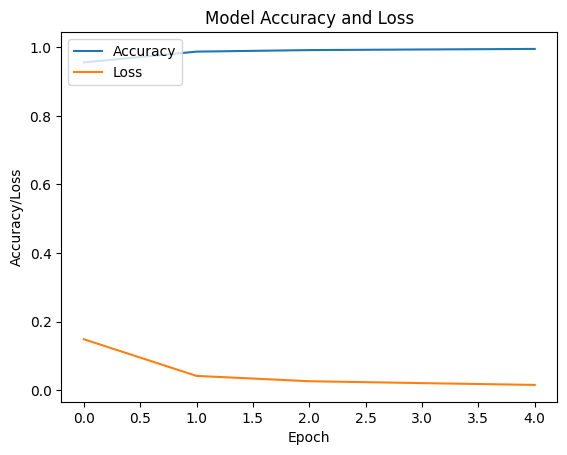

In [10]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend (['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=2)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 - 1s - 2ms/step - accuracy: 0.9921 - loss: 0.0239
Test loss: 0.023936891928315163
Test accuracy: 0.9921000003814697


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


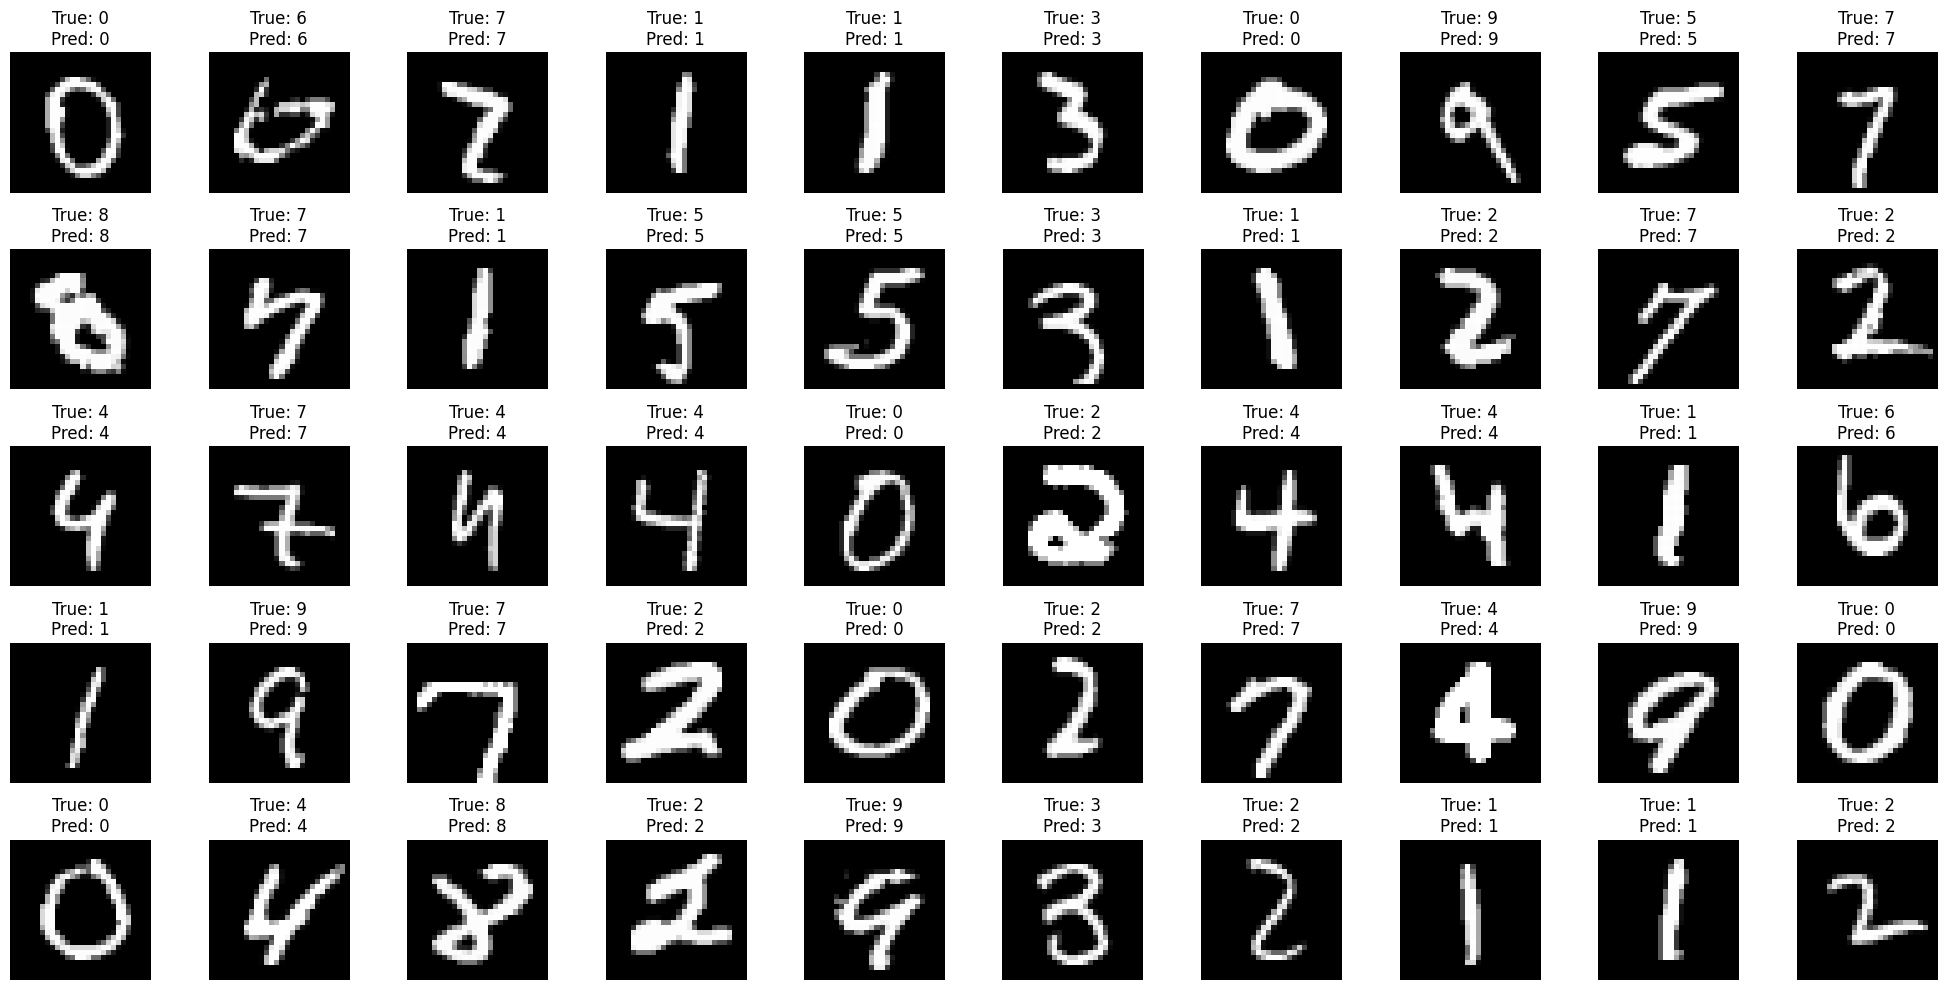

In [13]:
plot_preds(model, x_test, y_test)

### With Augmentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2
)

datagen.fit(x_train)

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten ())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Abdul Saboor\Programing\Virtual Enviroments\machinelearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train), epochs=5, verbose=1)

c:\Abdul Saboor\Programing\Virtual Enviroments\machinelearn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8249 - loss: 0.5279
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9610 - loss: 0.1226
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9703 - loss: 0.0931
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9752 - loss: 0.0761
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9792 - loss: 0.0631


In [18]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07193741947412491
Test accuracy: 0.9765999913215637
